In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graph
import morsesmale
import scipy.spatial
%matplotlib inline

func = lambda x : x**3 + x**2 - 1*x
points = np.linspace(-2,2,50)
func_vals = [func(x) for x in points]
print(points)
print(func_vals)

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
[-2.0, -1.4613468877763509, -0.98606872986595717, -0.57090158012392789, -0.21258149240537572, 0.092155479434588905, 0.34657328154085487, 0.55393586005830886, 0.7175071611318411, 0.84055113090633982, 0.92633171552669391, 0.97811286113779139, 0.99915851388452093, 0.99273261991177153, 0.96209912536443154, 0.91052197638738974, 0.84126511912553448, 0.75759249972375453, 0.6627680643269388, 0.56

In [2]:
pairs = scipy.spatial.distance.pdist(points.reshape(len(points), 1))
pdist = scipy.spatial.distance.squareform(pairs)
G = graph.generate_knn_graph(pdist, 2)
morsesmale.find_extrema(G, pdist, func_vals)
filtrations = morsesmale.get_filtrations(pdist, func_vals, 2)

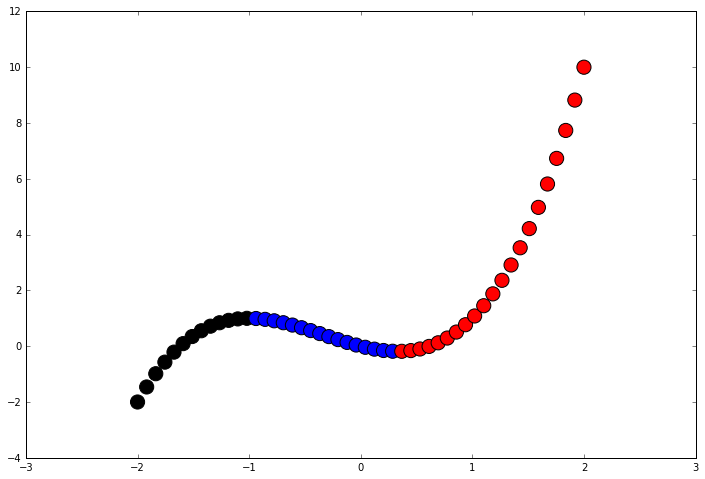

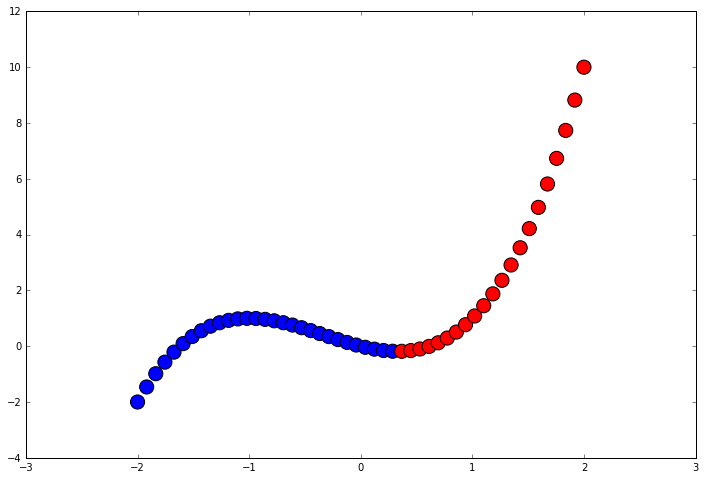

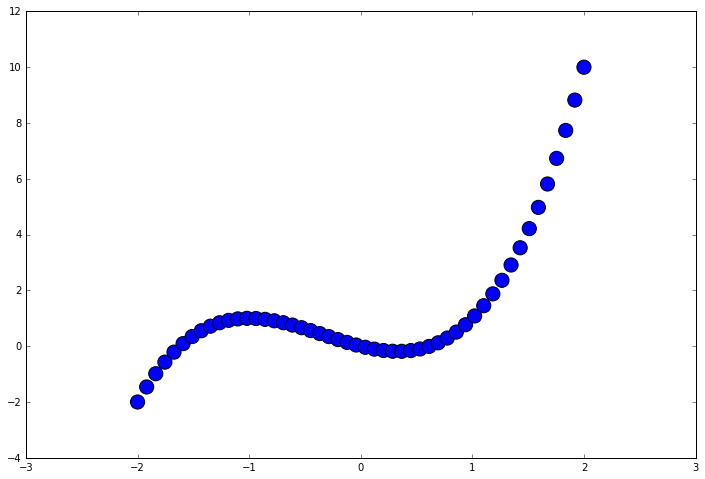

In [3]:
colors = ['r','b','k']
color_map = {crystal:colors[i] for i,crystal in enumerate(filtrations[0])}
for filtration in filtrations:
    reverse_lookup = {}
    for crystal,vertices in filtration.items():
        for v in vertices:
            reverse_lookup[v] = crystal
    c = [color_map[reverse_lookup[v]] for v in range(len(points))]
    plt.scatter(points, func_vals, c=c, s=200)
    plt.gcf().set_size_inches(12,8)
    plt.show()